#***Análisis de datos con Python Santander 2023***
*(Data Analysis with Python)*

#***Determinación del precio de la propiedad Airbnb***


> (Una pregunta recurrente para alguien que desea ofertar la propiedad en la plataforma es: ¿Cuánto debo cobrar por alquilar mi propiedad en Airbnb?)


<BR>

##*Equipo 8*

##*Fase3-Módulo 4*

##*Integrantes:*

* Isidro Amaro
* Francisco Gómez
* Tomás Antonio Hernández Pineda
* José Luis Herrera Gallardo
* Christian E. Millán Hernández


##<div class="markdown-google-sans"><a name="contenido">Contenido</a></div> 

* [Introducción](#introduccion)
* [Importación de librerías](#librerias)
* [Carga y revisión del conjunto de datos](#carga-revision)
* País: Estados Unidos
* Análisis de 6 ciudades
  * Boston
  * Chicago
  * Los Angeles
  * Nueva York
  * San Francisco
  * Washington DC



* [Estimados de Locación y Variabilidad.](#estimados)
* [Introducción a la visualización de datos.](#visualizacion-datos)
* [Exploración de Variables Categóricas y Análisis Multivariable.](#var-cat)
* [Correlaciones y Regresión Linear Simple.](#corr-reg-lin)
* [Distribuciones muestrales y técnicas de evaluación de modelos.](#dist-eval-mods)
* [Visualización de Datos Avanzada.](#visualizacion-avanzada)
* [Pruebas A/B y Procesamiento de Lenguaje Natural.](#nlp)
* [Introducción a Machine Learning: Clasificación No Supervisada y Supervisada.](#ml)

* [Conclusiones y siguientes pasos](#conclusiones)

## Extras:

* [Obtención de datos adicionales con Web Scraping](#webscraping)

## Enlaces
   
* [Presentación](https://docs.google.com/presentation/d/15a6yKehSkqinzb1_AUu4_btrAqpmGeVi/edit?usp=share_link&ouid=114487294612860477624&rtpof=true&sd=true)

* [Google Drive del Proyecto](https://drive.google.com/drive/folders/1qBsX0362VeaOsYH5vePxzqEwFHYvtC2_?usp=share_link)


* [Github repo del Proyecto](https://github.com/BeduDSEquipo9/C2DSF3_DAwPython)

* [Web Scraping Colab](https://colab.research.google.com/drive/19HFEGmKSxEVSvJzStKxA1V0jfRXFas8T?usp=share_link)



#<div class="markdown-google-sans"><a name="introduccion">Introducción</a></div>

De acuerdo a un análisis preliminar a los datos de la empresa Airbnb, se identificó el problema de la determinación del precio de las propiedades en arrendamiento, debido a una pregunta recurrente ¿Cuánto se debe cobrar por el alquiler de la propiedad?

Tras plantear una serie de preguntas, se recolectaron de fuentes públicas diversos conjuntos de datos con información proveniente de Airbnb. Las principales diferencias entre ellos son las fechas de extracción, las zonas geográficas, el número de observaciones y la cantidad de variables incluidas. 

Después de un análisis preliminar, se terminó por elegir un conjunto de datos, obtenido de Kaggle, que posee información de 6 de las ciudades más importantes de Estados Unidos: Boston, Chicago, San Francisco, Los Ángeles, Nueva York y Washington DC, mismo que ayudará a responder las preguntas de investigación planteadas.

Cabe señalar que dicho conjunto de datos ya fue preprocesado en los módulos anteriores.

#####([Regresar a la tabla de contenidos.](#contenido))

#<div class="markdown-google-sans"><a name="librerias">Importación de librerías</a></div> 
Se importan las librerías para el proyecto de análisis de datos.


In [ ]:
!pip install contractions

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
from scipy import stats

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import urllib.request
import math
from scipy.stats import skew, kurtosis
import matplotlib as mpl
import matplotlib.font_manager as fm
import folium

# Dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, f_regression

# Statistics
from scipy.stats import ks_2samp
from scipy.stats import chisquare
from sklearn.linear_model import Lasso, LinearRegression, Ridge, Lars, ElasticNet, BayesianRidge
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

#Librerías necesarias para la limpieza de texto
import string
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import contractions
import re

#Librerías necesarias para abrir imágenes, generar nube de palabras y plot
import urllib.request
from PIL import Image
from wordcloud import ImageColorGenerator

#####([Regresar a la tabla de contenidos.](#contenido))

#<div class="markdown-google-sans"><a name="carga-revision">Carga y revisión del conjunto de datos</a></div> 
Se realiza la carga del conjunto de datos y un rápido análisis exploratorio.

El conjunto de datos se encuentra almacenado en el Repositorio de Github que precede este análisis y en sus Google Drive. 

Si se quiere acceder vía Drive, es necesario habilitar el acceso a Google Colaboratory con la finalidad de cargar los datos. Enseguida, ejecute el siguiente par de celdas.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [ ]:
#Archivo local en GDrive

#Clean Dataset as Entry data to this analysis.
#/content/drive/MyDrive/BEDU/BEDUDS2022/BEDUDSF3M4PythonDataAnalisys2023Class/Gdrive_DAwPython/Datasets/airbnb_clean_F2M4_PostworkX.csv

#GDrive_Path='/content/drive/MyDrive/BEDU/BEDUDS2022/BEDUDSF3M4PythonDataAnalisys2023Class/Gdrive_DAwPython/'
#Datasets_Folder=GDrive_Path+'Datasets/'
#file_path=Datasets_Folder+filename
#print('Usando GDrivePath:'+file_path)

Sin embargo, como también se encuentra en Github, se recomienda acceder directamente desde este repositorio. De hecho, este notebook se ejecuta leyendo desde esta última fuente.

Nótese que el conjunto de datos está almacenado en formato `csv`, por lo que se utiliza `pd.read_csv()` para crear un objeto de tipo DataFrame.

In [10]:
#Dataset filename
filename='airbnb_clean_F2M4_Postwork7.csv'
#filename='Dataset_conCentros.csv'
#filename='Dataset_conDistanciasCentrosyCoordCentros.csv'
imagename='airbnbBW.png'

In [11]:
#Ruta al repo del archivo Github de Procesamiento de Datos con Python

Github_path = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/Datasets/'
Github_path_image = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/images/'

file_path=Github_path+filename
file_path_image=Github_path_image+imagename

print('Usando GithubPath: '+file_path)
print('Usando GithubPath image: '+file_path_image)

Usando GithubPath: https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/Datasets/airbnb_clean_F2M4_Postwork7.csv
Usando GithubPath image: https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/images/airbnbBW.png


In [12]:
data=pd.read_csv(file_path) 

Una vez cargados los datos en un DataFrame, se revisan. 

Hay que recordar que el conjunto de datos contiene información de diversas propiedades en algunas de las ciudades más importantes de Estados Unidos y que están listadas en la plataforma Airbnb para rentar.

Para revisar la estructura y ejemplos de los primeros y últimos registros, se utilizan las funciones `head()` y `tail()`.


In [13]:
data.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,AFFORDABLE & COZY IN SUNSET PARK T,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,Luxurious and quiet - 30 second walk to the be...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,Bensonhurst STYLISH STUDIO,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,LA San Gabriel Suit room 圣盖博大套房 免费停车 Free Par...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,"XTRA Large 2bdrm 2bath in the City near ""El"" T...",Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960


In [ ]:
data.tail()

El conjunto de datos contiene 59,288 observaciones y 26
 variables, de acuerdo con el resultado obtenido con el atributo `shape`.

In [ ]:
data.shape

Para conocer más detalles de la información se utiliza el método `info()`. Se distingue que ninguna de las variables contiene valores nulos y que la mayoría son valores numéricos (con excepción de los tipo *object*).

In [ ]:
data.info()

Otra opción para revisar los tipos de dato es con el atributo `dtypes`.

In [ ]:
data.dtypes

Como confirmación, con `isnull()` se verifica si existen valores ausentes o nulos.

In [ ]:
data.isnull().values.any()

Asimismo, se corrobora cuántos casos de `NaN` existen por columna con la ayuda de `isna()` y la función de agregación `sum()`.

In [ ]:
data.isna().sum()

De forma similar, se presenta un resumen del número de `NaN`en cada fila.

In [ ]:
data.isna().sum(axis=1)

Para conocer qué proporción del total representan los `Nan` se realiza lo siguiente:

In [ ]:
nulos_porcentaje=(data.isnull().sum()/len(data))*100 #Porcentaje de valores nulos
nulos_porcentaje.sort_values(ascending= False)

 **Como todos está en ceros, se confirma la presencia de un conjunto de datos completo y sin registros ni campos faltantes.**

#####([Regresar a la tabla de contenidos.](#contenido))

#Generando un nuevo dataset con columna con dato de distancia la cenbtro de la ciudad.

In [7]:
seleccion=data[['latitude','longitude']]
seleccion.head()

,latitude,longitude
0,40.650360,-74.003574
1,33.987589,-118.474525
2,40.602618,-73.993318
3,34.072653,-118.096453
4,41.781916,-87.606271


In [8]:
seleccion.loc[0]

latitude     40.650360
longitude   -74.003574
Name: 0, dtype: float64

In [9]:
#Lista de coordenadas por ciudad

#Los Angeles, CA, USA. Latitude and longitude coordinates are: 34.052235, -118.243683. 
la_latitudCentro=34.052235
la_longitudCentro=-118.243683
# NY Latitude and longitude coordinates are: 40.730610, -73.935242.
nyc_latitudCentro=40.730610
nyc_longitudCentro=-73.935242
# The latitude of Boston, MA, USA is 42.361145, and the longitude is -71.057083
boston_latitudCentro=42.361145
boston_longitudCentro=-71.057083
# The latitude of Chicago, IL, USA is 41.881832, and the longitude is -87.623177
chicago_latitudCentro=41.881832
chicago_longitudCentro=-87.623177
# San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297
sf_latitudCentro=37.773972
sf_longitudCentro=-122.431297
# GPS coordinates of Downtown (Washington, D.C.), United States. Latitude: 38.9015 Longitude: -77.0264.
dc_latitudCentro=37.773972
dc_longitudCentro=-77.0264
#(Fuente https://Latitude.to)

#Generando dataframe de trabajo, copia del original
df_conCoordenadas = data
df_conCoordenadas.city.unique()


array(['NYC', 'LA', 'Chicago', 'Boston', 'SF', 'DC'], dtype=object)

In [10]:
df_conCoordenadas

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,AFFORDABLE & COZY IN SUNSET PARK T,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,Luxurious and quiet - 30 second walk to the be...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,Bensonhurst STYLISH STUDIO,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,LA San Gabriel Suit room 圣盖博大套房 免费停车 Free Par...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,"XTRA Large 2bdrm 2bath in the City near ""El"" T...",Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59283,House,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,2,1,LA,Our newly renovated House is in the Lake Balbo...,...,Lake Balboa House / Zen Retreat!,Lake Balboa,5,88,91406,3.0,3.0,225.0,2239,4227
59284,Condominium,3,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,1.5,1,3,1,NYC,Beautiful modern duplex in old traditional Har...,...,Modern Beautiful Duplex in Brownstone,Harlem,11,100,10027,1.0,1.0,200.0,2017,4644
59285,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,1,2,1,LA,Explore Los Angeles with your own private cott...,...,Artsy and Spacious Back House,West Los Angeles,0,0,90064,1.0,2.0,135.0,19436,2996
59286,Apartment,3,"{TV,""Wireless Internet"",""Air conditioning"",""Wh...",3,1.0,1,3,1,NYC,Quiet 1 bedroom apartment located in luxury co...,...,Cozy Apartment off J&M Subway Lines,Bushwick,11,100,11206,1.0,1.0,115.0,2046,3141


Usando numpy para sacar el dato de distacia por suma de vectores y cuadrados sacando raiz.(no se confirmo su uso)

In [ ]:
import numpy as np

a = np.array((1, 2))
b = np.array((4, 5))
dist = np.sqrt(np.sum(np.square(a-b)))
print(dist)

centro=np.array((la_latitudCentro,la_longitudCentro))
coordinates=np.array((sf_latitudCentro,sf_longitudCentro))

dist = np.sqrt(np.sum(np.square(coordinates-centro)))

print("distancia ls a sf",dist)


Primer formula para calculo de haversine,( el labda aplly tuvo problemas y ya no se uso )

In [ ]:
from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'miles'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kms':
        return round(distance * 1.609344, 2)

Segunda formula de haversine, est afue la que funciono.

In [11]:
import pandas as pd
import numpy as np

def haversine(lon2, lat2,lon1, lat1, ):
    #Todos son floats
    #lon1 = np.radians(lon1)
    #lat1 = np.radians(lat1)
    #lon2 = np.radians(lon2)
    #lat2 = np.radians(lat2)
    lon1,lat1,lon2,lat2=map(np.radians,[lon1,lat1,lon2,lat2])

    #Radio de la tierra en kms
    r = 6371
     
    dlon = np.subtract(lon2, lon1)
    dlat = np.subtract(lat2, lat1)

    a = np.add(np.power(np.sin(np.divide(dlat, 2)), 2),
               np.multiply(np.cos(lat1),
                           np.multiply(np.cos(lat2),
                                       np.power(np.sin(np.divide(dlon, 2)), 2))
                           )
              )
    c = np.multiply(2, np.arcsin(np.sqrt(a)))

    return c*r

In [12]:
df_conCoordenadas['latitudeCentro']=np.where(df_conCoordenadas['city'] =='LA', la_latitudCentro,
  np.where(df_conCoordenadas['city'] =='NYC',nyc_latitudCentro,
  np.where(df_conCoordenadas['city'] =='Boston', boston_latitudCentro,
  np.where(df_conCoordenadas['city'] =='Chicago', chicago_latitudCentro,
  np.where(df_conCoordenadas['city'] =='SF', sf_latitudCentro, dc_latitudCentro
  )))))

df_conCoordenadas['longitudeCentro']= np.where(df_conCoordenadas['city'] =='LA', la_longitudCentro,
  np.where(df_conCoordenadas['city'] =='NYC',nyc_longitudCentro,
  np.where(df_conCoordenadas['city'] =='Boston', boston_longitudCentro,
  np.where(df_conCoordenadas['city'] =='Chicago', chicago_longitudCentro,
  np.where(df_conCoordenadas['city'] =='SF', sf_longitudCentro, dc_longitudCentro
  )))))

df_conCoordenadas['distanciaCentro'] = df_conCoordenadas.apply(lambda fila: haversine(fila['longitudeCentro'],fila['latitudeCentro'],fila['longitude'],fila['latitude']),axis=1)

In [84]:
df_conCoordenadas['distanciaCentro'] = df_conCoordenadas.apply(lambda fila: haversine(fila['longitudeCentro'],fila['latitudeCentro'],fila['longitude'],fila['latitude']),axis=1)

#Agregamos el dataframe reducido a nuestro dataframe resultante.
#df_result = df_result.append(df_conCoordenadas)

In [13]:
df_conCoordenadas

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,latitudeCentro,longitudeCentro,distanciaCentro
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,89,11232,1.0,1.0,50.0,2003,4200,40.730610,-73.935242,10.621672
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,98,90291,1.0,1.0,199.0,2430,3272,34.052235,-118.243683,22.456674
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,94,11214,0.0,2.0,85.0,2057,2756,40.730610,-73.935242,15.051423
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,95,91776,1.0,2.0,70.0,2182,2559,34.052235,-118.243683,13.751080
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,88,60637,2.0,2.0,72.0,2192,2960,41.881832,-87.623177,11.198063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59283,House,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,2,1,LA,Our newly renovated House is in the Lake Balbo...,...,88,91406,3.0,3.0,225.0,2239,4227,34.052235,-118.243683,28.826098
59284,Condominium,3,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,1.5,1,3,1,NYC,Beautiful modern duplex in old traditional Har...,...,100,10027,1.0,1.0,200.0,2017,4644,40.730610,-73.935242,8.691043
59285,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,1,2,1,LA,Explore Los Angeles with your own private cott...,...,0,90064,1.0,2.0,135.0,19436,2996,34.052235,-118.243683,18.658614
59286,Apartment,3,"{TV,""Wireless Internet"",""Air conditioning"",""Wh...",3,1.0,1,3,1,NYC,Quiet 1 bedroom apartment located in luxury co...,...,100,11206,1.0,1.0,115.0,2046,3141,40.730610,-73.935242,3.362620


Guardando dataset, al final se agrego la columna de la distancia. Los datos son en millas.

In [21]:
df_conCoordenadas.to_csv("Dataset_conDistanciasCentrosyCoordCentros.csv", index=False)

In [20]:
df_conCoordenadas_drop=df_conCoordenadas.drop(['latitudeCentro','longitudeCentro'],axis=1)

In [17]:
df_conCoordenadas_drop

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200,10.621672
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272,22.456674
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756,15.051423
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559,13.751080
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960,11.198063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59283,House,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,2,1,LA,Our newly renovated House is in the Lake Balbo...,...,Lake Balboa,5,88,91406,3.0,3.0,225.0,2239,4227,28.826098
59284,Condominium,3,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,1.5,1,3,1,NYC,Beautiful modern duplex in old traditional Har...,...,Harlem,11,100,10027,1.0,1.0,200.0,2017,4644,8.691043
59285,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,1,2,1,LA,Explore Los Angeles with your own private cott...,...,West Los Angeles,0,0,90064,1.0,2.0,135.0,19436,2996,18.658614
59286,Apartment,3,"{TV,""Wireless Internet"",""Air conditioning"",""Wh...",3,1.0,1,3,1,NYC,Quiet 1 bedroom apartment located in luxury co...,...,Bushwick,11,100,11206,1.0,1.0,115.0,2046,3141,3.362620


In [19]:
df_conCoordenadas_drop.to_csv("Dataset_conCentros.csv", index=False)

Process new Dataset    

In [8]:
data.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200,10.621672
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272,22.456674
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756,15.051423
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559,13.751080
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960,11.198063


In [9]:
df_2train = data.drop(columns=['city', 'neighbourhood', 'property_type', 'room_type', 'zipcode', 'amenities','bed_type', 'cleaning_fee', 'cancellation_policy', 'instant_bookable', 'description', 'name', 'host_has_profile_pic', 'host_identity_verified', 'longitude', 'latitude'])

In [10]:
df_2train.corr()

,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro
accommodates,1.000000,0.500245,0.136909,0.043417,0.050059,0.705671,0.806765,0.514426,-0.050760,-0.002608,0.068136
bathrooms,0.500245,1.000000,0.049705,-0.036974,-0.025301,0.583065,0.518770,0.452961,0.030599,-0.003255,0.067694
host_response_rate,0.136909,0.049705,1.000000,0.282962,0.385598,0.058078,0.120452,-0.061501,-0.377211,0.017747,0.009506
number_of_reviews,0.043417,-0.036974,0.282962,1.000000,0.294395,-0.034397,0.033760,-0.069193,-0.294634,0.199397,-0.012115
review_scores_rating,0.050059,-0.025301,0.385598,0.294395,1.000000,-0.009391,0.036819,-0.130256,-0.951795,0.121589,-0.039131
bedrooms,0.705671,0.583065,0.058078,-0.034397,-0.009391,1.000000,0.704894,0.486733,0.013264,0.017514,0.045518
beds,0.806765,0.518770,0.120452,0.033760,0.036819,0.704894,1.000000,0.424714,-0.040446,-0.018770,0.042301
price,0.514426,0.452961,-0.061501,-0.069193,-0.130256,0.486733,0.424714,1.000000,0.145922,0.018856,0.093714
n_days_lastrev,-0.050760,0.030599,-0.377211,-0.294634,-0.951795,0.013264,-0.040446,0.145922,1.000000,-0.110537,0.049042
n_days_ashost,-0.002608,-0.003255,0.017747,0.199397,0.121589,0.017514,-0.018770,0.018856,-0.110537,1.000000,-0.018459


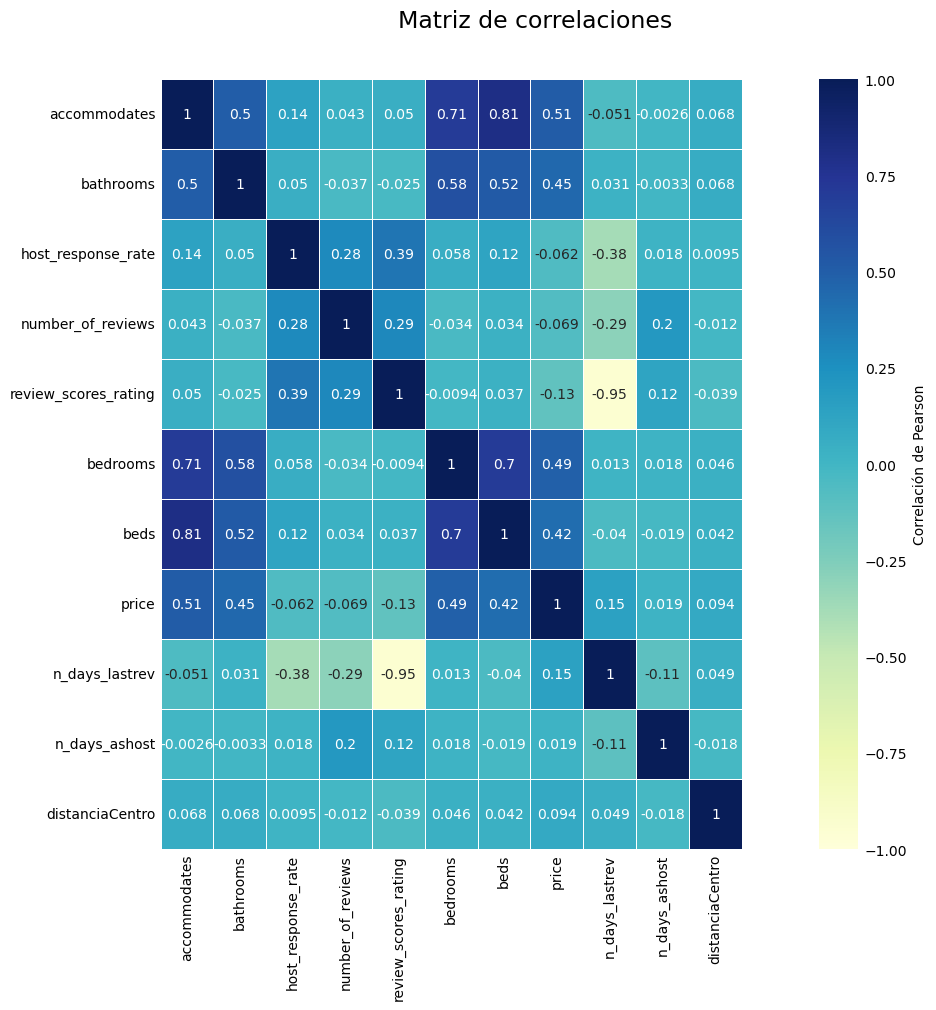

In [12]:
#Matriz de correlaciones
plt.figure(figsize=(10, 10))
plt.suptitle("Matriz de correlaciones", size = 17, y = 0.95)

ax = sns.heatmap(df_2train.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5,cbar_kws = {'orientation': 'vertical',
                                       'pad': 0.1},);
                                       
ax.tick_params(axis='both', length=0, labelsize=10)
cbar_corr = ax.collections[0].colorbar
cbar_corr.set_label('Correlación de Pearson', size=10)
cbar_corr.ax.tick_params(axis='both', length=0, labelsize=10, pad=5)

In [14]:
X= df_2train[["accommodates", 'bedrooms', 'beds','distanciaCentro']]
y =df_2train['price']

prop_entrenamiento = 0.6
prop_validacion = 0.1
prop_prueba = 0.3

val_mas_prueba = prop_validacion + prop_prueba

In [15]:
## Regresión Lineal 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_mas_prueba)


In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_predict = lr.predict(X_test)

mean_squared_error(y_test, y_predict)

20517.969215183857

In [18]:
lr.score(X_test, y_test)

0.29955749335868365

In [19]:
# Utilizando una Validación Cruzada

from sklearn.model_selection import cross_val_score

cross_val_score(lr,X, y, cv=5)

array([0.30542391, 0.28154696, 0.30421791, 0.29696186, 0.31424879])

In [20]:
## Regresión Polinomial

### De grado 2

from sklearn.preprocessing import PolynomialFeatures

poly_2 =PolynomialFeatures(degree=2)
X_2 =  poly_2.fit_transform(X)

In [21]:
lr_p = LinearRegression()
lr_p.fit(X_2, y)

LinearRegression()

In [22]:
cross_val_score(lr_p,X_2, y, cv=5)

array([0.32316689, 0.30395165, 0.32901353, 0.31752326, 0.34691576])

In [23]:
np.sum(cross_val_score(lr_p,X_2,y, cv=5))/5


0.32411421846316674

In [24]:
### De Grado 3

poly_3 =PolynomialFeatures(degree=3)
X_3 =  poly_2.fit_transform(X)

In [25]:
lr_p3 = LinearRegression()
lr_p3.fit(X_3, y)

LinearRegression()

In [26]:
np.sum(cross_val_score(lr_p3,X_3,y, cv=5))/5

0.32411421846316674

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="conclusiones">Conclusiones y siguientes pasos</a></div> 

Una vez finalizado el análisis y la manipulación del conjunto de datos inicial, es posible concluir lo siguiente:
* La información filtrada y transformada para su mejor aprovechamiento únicamente explica menos 30% del comportamiento del precio de una propiedad listada en Airbnb. 
* Al descartar variables por no tener una correlación tan alta, se perdió información que abonaba a la explicación de la varianza. No obstante, esa ganancia no era significativa en comparación a la complejidad que ganaba el modelo con tantas variables más.
* Al ser tan bajo el porcentaje de la explicación de la variabilidad, se evidencia que seguramente existen variables que no aparecen en el conjunto de datos original y que podrían tener mayor influencia en el comportamiento del precio, por ejemplo: tamaño de la propiedad, superficie en metros cuadrados, cercanía a sitios de interés turístico, día de la semana de la reserva, si es un día festivo o no, si es temporada vacacional o no, etc.
* Otra variable que puede agregar información importante tiene que ver con la presencia de amenidades en la propiedad. Como la variable original lista las amenidades entre llaves, se propone la creación de funciones que permitan convertir a `dummy`cada amenidad existente. Lo anterior podría abonar a la explicación del precio.
* Para precios bajos, el modelo de regresión lineal tiene un desempeño pobre, pero mejor que para precios altos, pues la predicción es más parecida al precio real. Esto corresponde con lo observado en el análisis exploratorio, pues únicamente el 3% de las observaciones originales tenía dicho rango de precios y, con tan pocos datos, ningún modelo tiene los elementos suficientes para predecir correctamente precios concretos. 
* Aproximar el precio de las propiedades clasificándolos en "Alto" y "Bajo" tiene un mucho mejor desempeño y precisión, incluso con pocas variables predictoras. 
* El análisis de texto para las descripciones, reseñas y amenidades abonó para entender cómo la frecuencia y repetición de ciertas palabras arrojan una explicación al por qué una propiedad es más cara o más barata.

Por lo anterior, tiene mérito establecer como siguiente paso el desarrollo de modelos con mejor desempeño en la predicción de precios, ya sea utilizando diferentes algoritmos o predictores disponibles (como las amenidades), o bien, buscando fuentes de información con más variables de las observaciones existentes o nuevos registros de propiedades con precios altos para correr el modelo sugerido. 

También puede intentarse correr otros modelos con la misma información, pero esto será posible hasta módulos posteriores, donde se aprenda sobre modelos de aprendizaje supervisado más avanzados que una Regresión Lineal.

#####([Regresar a la tabla de contenidos.](#contenido))